In [32]:
import pandas as pd

In [33]:
import warnings
warnings.simplefilter("ignore")

import konlpy
konlpy.__version__

'0.5.1'

In [34]:
from konlpy.tag import Okt
okt = Okt() # 객체 생성

In [35]:
from konlpy.tag import Twitter 
from collections import Counter

In [36]:
#final = pd.read_csv('./title_전처리.csv', names =['f_title'])
final = pd.read_csv('../data/real_final.csv')

FileNotFoundError: [Errno 2] File b'../data/real_final.csv' does not exist: b'../data/real_final.csv'

In [130]:
final.columns

Index(['year', 'month', 'week', 'rank', 'song_id', 'title', 'like', 'reply',
       'genre', 'artist_id', 'artist', 'fan', 'album_id', 'album',
       'album_release_date', 'album_reply', 'album_score', 'album_score_count',
       '키즈', 'POP', '국내뮤지컬', '국외영화', '발라드', '크로스오버', 'EDM', '랩/힙합', '국내영화',
       '애시드/퓨전/팝', '댄스', 'JPOP', '인디음악', '일렉트로니카', '성인가요', 'R&B/Soul', '재즈',
       '록/메탈', '클래식', '애니메이션/웹툰', '만화', '게임', '뉴에이지', '국내드라마', '포크/블루스'],
      dtype='object')

In [131]:
final.shape

(51292, 43)

# feat 빼주기

In [132]:
title = final['title'].apply(lambda x: x.split('(Feat.')[0].split('(feat.')[0].split('(Prod.')[0].split('(prod.')[0].split('(With')[0].split('(Sung')[0].split('(Clean')[0].split('(Original')[0].split('(Korean')[0].split('(BigRoom')[0].split('(Main')[0].split('(Retro')[0].split('(New')[0].split('(Sincere')[0].split('(PROD')[0].split('(Steve')[0].split('(Intro.')[0].split('(Rock')[0].split('(JTBC')[0].split('(MINO')[0].split('(답가')[0].split('(2011')[0].split('(Part')[0].split('(삼성')[0].split('(Full')[0].split('(Song')[0].split('(2019')[0].split('feat')[0].split('(Hidden')[0].split('(Duet')[0].split('(BTS')[0].split('(X1')[0].split('(Narr')[0].split('(피쳐링')[0])
df = pd.DataFrame(columns = ('year','title', 'genre'))
df['year'] = final['year']
df['title'] = title
df['genre'] = final['genre']

In [133]:
title.shape

(51292,)

In [134]:
df

,year,title,genre
0,2010,우리 사랑하게 됐어요.,['댄스']
1,2010,너 때문에,['댄스']
2,2010,Bo Peep Bo Peep,['댄스']
3,2010,오늘 헤어졌어요,['발라드']
4,2010,처음처럼 그때처럼,['발라드']
...,...,...,...
51287,2019,달,['발라드']
51288,2019,FLASH,['댄스']
51289,2019,Here I Am,['발라드']
51290,2019,Another Day,"['발라드', '국내드라마']"


# 중복허용 연도.txt 뽑아내기

In [233]:
df

,year,title,genre
0,2010,우리 사랑하게 됐어요.,['댄스']
1,2010,너 때문에,['댄스']
2,2010,Bo Peep Bo Peep,['댄스']
3,2010,오늘 헤어졌어요,['발라드']
4,2010,처음처럼 그때처럼,['발라드']
...,...,...,...
51287,2019,달,['발라드']
51288,2019,FLASH,['댄스']
51289,2019,Here I Am,['발라드']
51290,2019,Another Day,"['발라드', '국내드라마']"


In [234]:
new = df[df['year'] == 2010]

In [128]:
#df = df['title']

In [115]:
# year_2010.to_csv('2010년_중복허용.txt', index = False)

# 중복제거 연도 txt 뽑아오기

In [235]:
new = new.reset_index()

In [236]:
new_dup = new.drop_duplicates(subset='title', keep='first')

In [237]:
new_dup = new_dup.drop(columns='index')

In [238]:
new_dup

,year,title,genre
0,2010,우리 사랑하게 됐어요.,['댄스']
1,2010,너 때문에,['댄스']
2,2010,Bo Peep Bo Peep,['댄스']
3,2010,오늘 헤어졌어요,['발라드']
4,2010,처음처럼 그때처럼,['발라드']
...,...,...,...
5183,2010,지금처럼,['발라드']
5188,2010,단 한 사람,['댄스']
5189,2010,Heal,['발라드']
5194,2010,Thanks To,['댄스']


In [239]:
# df_dup.to_csv('중복제거_전처리완료.csv', index = False)

In [240]:
df_dup2 = new_dup['title']

In [241]:
df_dup2.to_csv('2010년_중복제거.txt', index = False)

# 텍스트 파일 불러오기

In [351]:
file = open('./2019년_중복제거.txt', 'r') 
lists = file.readlines() 
file.close() 
lists

['넘쳐흘러\n',
 '벌써 12시\n',
 '180도\n',
 '신용재\n',
 'SOLO\n',
 '아낙네\n',
 'MILLIONS\n',
 '너를 만나\n',
 'YES or YES\n',
 '"모든 날, 모든 순간 (Every day, Every Moment)"\n',
 '내 생에 아름다운\n',
 'Love Shot\n',
 '가을 타나 봐\n',
 '첫눈에\n',
 '삐삐\n',
 '흔한 이별\n',
 '고백\n',
 'Tempo\n',
 '이별하러 가는 길\n',
 '너도 그냥 날 놓아주면 돼\n',
 'Way Back Home\n',
 '아름답고도 아프구나\n',
 '하루도 그대를 사랑하지 않은 적이 없었다\n',
 '열애중\n',
 'IDOL\n',
 '"thank u, next"\n',
 'Good Day \n',
 '%%(응응)\n',
 '사계 (하루살이)\n',
 '지나오다\n',
 '봄바람\n',
 '알았다면\n',
 'Bohemian Rhapsody \n',
 '뚜두뚜두 (DDU-DU DDU-DU)\n',
 '습관 (Bad Habits)\n',
 '라비앙로즈 (La Vie en Rose)\n',
 'IndiGO\n',
 '우리 그만하자\n',
 '사이렌 (Siren)\n',
 'FAKE LOVE\n',
 '헤어지는 중\n',
 '동화 \n',
 '너는 어땠을까\n',
 '시간이 들겠지 \n',
 '미안해\n',
 '밤편지\n',
 'Dance The Night Away\n',
 '비\n',
 '봄날\n',
 '가을 안부\n',
 '행복\n',
 'Wind flower\n',
 '너 없인 안 된다\n',
 '이별길 (GOODBYE ROAD)\n',
 '멋지게 인사하는 법 \n',
 '꿈처럼 내린\n',
 'flex \n',
 'DNA\n',
 '그때 헤어지면 돼\n',
 '그리워하다\n',
 'I`m Fine\n',
 'Snowman\n',
 'I`M OK\n',
 '트라우마 (Trauma)\n',
 'Gravity\n',
 'RBB 

# 형태소 나누기

In [352]:
twitter = Twitter()
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

# 명사, 형용사, 부사만 골라내기

In [353]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 
            
print(noun_adj_adv_list)


['벌써', '도', '신용재', '아낙네', '너', '모든', '날', '모든', '순간', '생', '가을', '눈', '삐삐', '이별', '고백', '이별', '길', '너', '그냥', '날', '하루', '그대', '사랑', '적', '열애', '사계', '하루살이', '봄바람', '뚜', '뚜', '습관', '라비', '로', '우리', '사이렌', '중', '동화', '너', '시간', '밤', '편지', '비', '봄날', '가을', '안부', '행복', '너', '안', '이별', '길', '인사', '법', '꿈', '그때', '트라우마', '사랑', '알', '순간', '비', '제', '사랑', '사랑', '전하', '못', '진심', '시간', '여기', '눈', '너', '부메랑', '가끔', '후', '폭풍', '여행', '오아시스', '그날', '선물', '띵', '초록빛', '길', '겨울', '거', '그때', '그', '남자', '이', '마음', '청곡', '사랑', '거', '이별', '사랑', '숨', '차', '이', '노래', '클럽', '마', '기억', '행성', '아주', '포옹', '미리', '메리', '크리스마스', '알러뷰', '크리스마스', '불꽃놀이', '만이', '멍청이', '달라', '달라', '롯', '옥탑방', '그대만', '날', '사랑', '오늘', '뭐', '누', '아르', '시작', '봄', '너', '세상', '봄', '날', '날', '머리', '뿔', '놈', '별', '술', '봄', '고고', '베베', '새벽', '여자친구', '호불호', '주저', '연인', '위해', '비', '온대', '바람', '오늘', '밤', '아마', '우리', '잘못', '야간비행', '당신', '혼자', '날', '눈', '노래방', '별', '헤', '밤', '일산', '모습', '그대로', '벚꽃', '엔딩', '사계', '진심', '노래', '밤', '사랑', '연습', '왜', '엄마

# 빈도수대로 정렬하기

In [354]:
count = Counter(noun_adj_adv_list)

In [355]:
words = dict(count.most_common())

In [356]:
words

{'사랑': 19,
 '너': 14,
 '밤': 14,
 '우리': 10,
 '날': 9,
 '이별': 9,
 '그대': 6,
 '비': 6,
 '시간': 5,
 '이': 5,
 '가을': 4,
 '오늘': 4,
 '뭐': 4,
 '봄': 4,
 '별': 4,
 '속': 4,
 '모든': 3,
 '눈': 3,
 '길': 3,
 '인사': 3,
 '그때': 3,
 '알': 3,
 '거': 3,
 '그': 3,
 '마음': 3,
 '노래': 3,
 '시작': 3,
 '꽃': 3,
 '널': 3,
 '문제': 3,
 '니': 3,
 '순간': 2,
 '사계': 2,
 '뚜': 2,
 '봄날': 2,
 '안부': 2,
 '진심': 2,
 '가끔': 2,
 '기억': 2,
 '크리스마스': 2,
 '달라': 2,
 '술': 2,
 '연인': 2,
 '바람': 2,
 '혼자': 2,
 '시': 2,
 '볼': 2,
 '우린': 2,
 '걸': 2,
 '물': 2,
 '조금': 2,
 '더': 2,
 '끝': 2,
 '음파': 2,
 '다시': 2,
 '전화': 2,
 '운명': 2,
 '벌써': 1,
 '도': 1,
 '신용재': 1,
 '아낙네': 1,
 '생': 1,
 '삐삐': 1,
 '고백': 1,
 '그냥': 1,
 '하루': 1,
 '적': 1,
 '열애': 1,
 '하루살이': 1,
 '봄바람': 1,
 '습관': 1,
 '라비': 1,
 '로': 1,
 '사이렌': 1,
 '중': 1,
 '동화': 1,
 '편지': 1,
 '행복': 1,
 '안': 1,
 '법': 1,
 '꿈': 1,
 '트라우마': 1,
 '제': 1,
 '전하': 1,
 '못': 1,
 '여기': 1,
 '부메랑': 1,
 '후': 1,
 '폭풍': 1,
 '여행': 1,
 '오아시스': 1,
 '그날': 1,
 '선물': 1,
 '띵': 1,
 '초록빛': 1,
 '겨울': 1,
 '남자': 1,
 '청곡': 1,
 '숨': 1,
 '차': 1,
 '클럽': 1,
 '마': 1,
 

In [357]:
# del words['사랑']
# del words['너']

# 워드 클라우드 만들기

In [358]:
# from wordcloud import WordCloud 
# import matplotlib.pyplot as plt

# import nltk 
# from nltk.corpus import stopwords

In [359]:
# %matplotlib inline 
# import matplotlib
# from IPython.display import set_matplotlib_formats 
# matplotlib.rc('font',family = 'Malgun Gothic') 

# set_matplotlib_formats('retina') 
# matplotlib.rc('axes',unicode_minus = False)


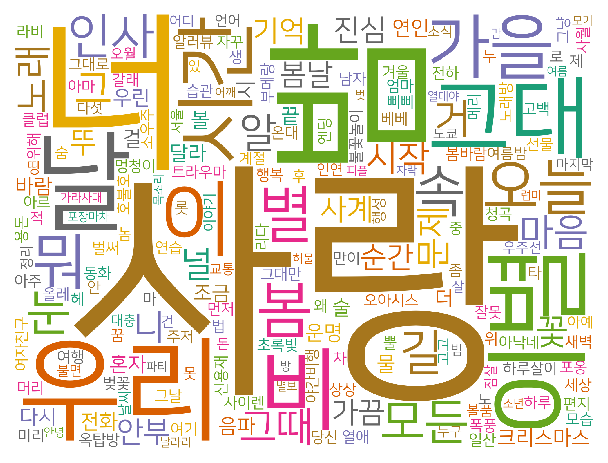

In [360]:
wordcloud = WordCloud(font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf', background_color='white',colormap = "Dark2", width=2000, height=1500).generate_from_frequencies(words) 

plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

# 이미지를 입혀보아요

In [361]:
# from PIL import Image
# import numpy as np

In [362]:
alice_mask = np.array(Image.open("./2019.png"))

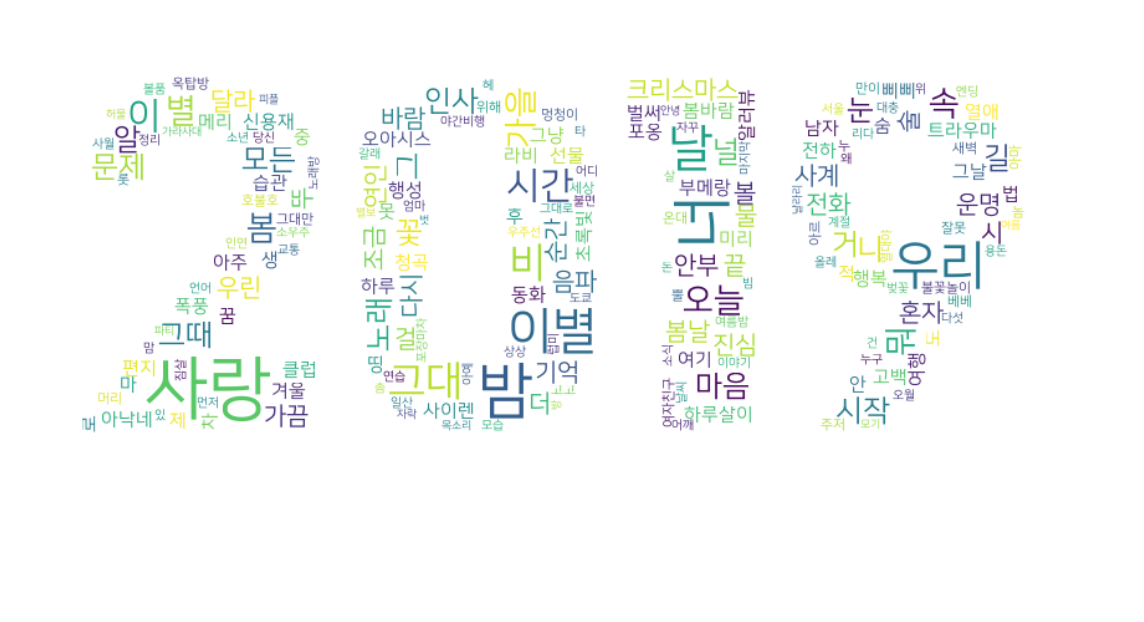

In [363]:
wordcloud = WordCloud(
    font_path = '/Users/yaein/Library/Fonts/NanumSquareOTFRegular.otf',             
    width = 800,
    height = 800,
    background_color="white",
    mask = alice_mask
).generate_from_frequencies(words) 

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()